In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/nuevas_series_29_8/'

citas = []
with open('d:/Git_Proyects/Tesis/Base_Twitter/muchas_citas.txt', 'r', encoding = 'utf8') as f:
    Lines = f.readlines()
    for line in Lines:
        citas.append(line)

Les pido a los que nos odian, o que nos ven como enemigos, que por favor, que por favor se metan conmigo. Pero no con ella. No más con ella por favor



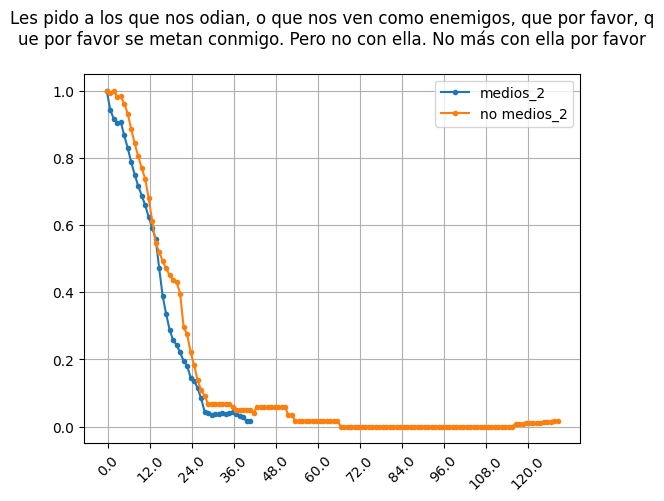

In [9]:
index = 10

df_clus_completo = pd.read_csv(path_git+'Tw_mas_RT_s/Tweets_cluster_con_RT_'+str(index)+'_55.csv')#, dtype={'Tweets':str, 'Fecha':str, 'id':str})
no_medios = ['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone', 'Twitter for iPad', 'Twitter Web Client', 'Mobile Web (M2)', 'Instagram', 'TwotPane for Android', 'Tweetbot for iOS', 'Facebook', 'TweetDeck', 'IFTTT', 'Twitter Media Studio']
def generar_medios(source):
    medios = True
    if source in no_medios or source==np.nan or source == 'NaN':
        medios = False
    return medios

df_clus_completo['medios_2'] = df_clus_completo['source_y'].apply(generar_medios)
# path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/Tw_200_citas_05/'
# #df_clus_completo = pd.read_csv(path_git+'Tweets_cluster_con_RT/no_se_inunda_mas_Macri.csv')
# index = 8
# df_clus_completo = pd.read_csv(path_git+'Tw_'+str(index)+'_Cluster_muchas.csv ')

# df_clus_completo = pd.read_csv(path_git+'../Tweets_cluster_con_RT_Tinelli_055.csv')

df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha_x'], format='%a %b %d %H:%M:%S +0000 %Y')
df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600

categoria = 'medios_2'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = [categoria, 'no '+categoria]
root = 0

plt.figure()
#plt.title('Lo que pasó fue que dos dirigentes importantes de Cambiemos no se pusieron de acuerdo en cómo dirimir sus candidaturas  \n en una interna y llevaron las cosas a un punto en el que hoy vamos a tener dos candidatos que representan el mismo espacio. Es algo que no queríamos')
firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]
#plt.title(citas[index])
plt.title(firstpart+'\n'+secondpart)
print(citas[index])
for i, df1 in enumerate(df_categoria):
    df = df1.copy()
    df_index = df.set_index('Fecha')
    df_count_hora = df_index.resample('1H').count()
    #plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'sin rolling window'+str(i)) #Test comparation
    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')

plt.legend()
plt.grid(0.7)




plt.xticks(rotation=45)
plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12)))
#plt.xticks(np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12))
#plt.xlim([datetime(2019, 3, 1), datetime(2019, 3, 5)])
plt.show()
#plt.savefig(path_git+f'/imagenes/imag_{index}.png')
